Read the dataset and clean the data

In [1]:
import pandas as pd
df = pd.read_csv('b.csv')


# Clean the data

categoryCol=['substrict','type','direction']
for i in categoryCol:
    df[i]=df[i].astype("category")

df['time'] = pd.to_datetime(df['time'], format='%Y.%m.%d')

for i in range(len(df)):
    if df.loc[i,'time'] < pd.Timestamp(2011, 1, 1):
        df.loc[i,'time']=pd.Timestamp(2011, 1, 1)

def cleanMinus(data):
    data=str(data)
    if data.find('-')==-1:
        return data
    data=data.split('-')
    return data[0]

def cleanColMinus(df,colName):
    for i in range(len(df)):
        df.loc[i,colName]=cleanMinus(df.loc[i,colName])

minusCols=['price','price per m2']
for i in minusCols:
    cleanColMinus(df,i)
    df[i]=df[i].astype('float64')

df.index = df['time']

<AxesSubplot:xlabel='time'>

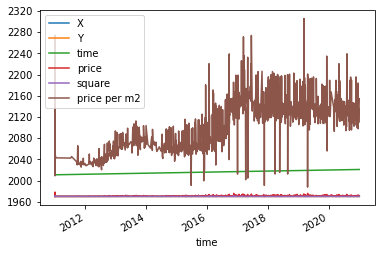

In [3]:
df.plot()

In [5]:

from statsmodels.tsa.arima_model import ARMA
import statsmodels as sm
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


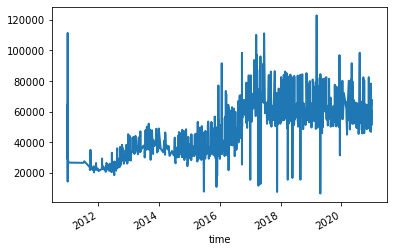

In [9]:
df['price per m2'].plot(linewidth=2);

In [14]:
data_columns = ['square', 'price per m2']
# Resample to weekly frequency, aggregating with mean
df_weekly_mean = df[data_columns].resample('W').mean()
df_weekly_mean.head(3)

df_weekly_mean=df_weekly_mean.dropna()

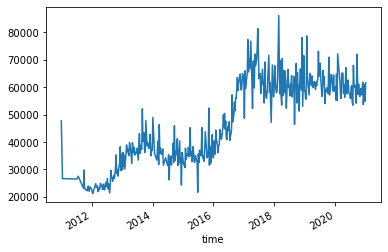

In [38]:
df_weekly_mean['price per m2'].plot()

df_weekly_mean.to_csv('c.txt')

In [21]:
df_weekly_mean.index

DatetimeIndex(['2011-01-02', '2011-01-16', '2011-07-10', '2011-07-24',
               '2011-09-25', '2011-10-02', '2011-10-09', '2011-10-16',
               '2011-10-30', '2011-11-06',
               ...
               '2020-11-01', '2020-11-08', '2020-11-15', '2020-11-22',
               '2020-11-29', '2020-12-06', '2020-12-13', '2020-12-20',
               '2020-12-27', '2021-01-03'],
              dtype='datetime64[ns]', name='time', length=434, freq=None)

In [26]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
# contrived dataset
data = df_weekly_mean['price per m2']
# fit model
model = AutoReg(data, lags=1)
model_fit = model.fit()
# make prediction
#yhat = model_fit.predict(df_weekly_mean.index, len(df_weekly_mean.index))
yhat = model_fit.predict(2, 3)
print(yhat)
#yhat.plot()

time
2011-07-10   NaN
2011-07-24   NaN
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

<AxesSubplot:xlabel='time'>

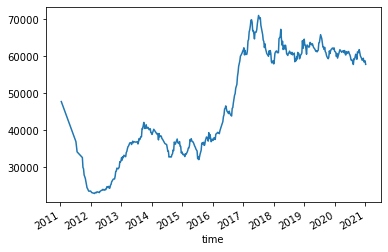

In [37]:
from statsmodels.tsa.arima_model import ARIMA
result_arima = ARIMA(df_weekly_mean['price per m2'], order=(3,1,1)).fit()

predict_ts = result_arima.predict(typ='levels')  #若不设置typ，预测的值为差分值，需要自己还原

predict_ts.plot()